In [1]:
!pip install Wordcloud
!pip install Sastrawi

In [2]:
!pip3 install scikit-learn

In [3]:
!pip3 install imbalanced-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS

In [6]:
data = pd.read_csv('IKN200.csv')
data.head()

,Username,Text Coment,Sentiment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,@marda_azza~,Pemerataan ekknomi dan penduduk bukan dengan p...,Negatif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@dhidhiLp~,Ikn bukan solusi tp kolusi.,Negatif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@supratmanareaky~,Yang sudah eksis aja gak tumbuh malah ancur di...,Negatif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@Aisyunanto~,"Mbabat hutan bilang ya utk pemerataan, kenapa ...",Negatif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@LengkengMasak~,Kenapa duit segitu gede tidak di bagi ke beber...,Negatif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.drop('Unnamed: 3', axis=1, inplace=True)
data.drop('Unnamed: 4', axis=1, inplace=True)
data.drop('Unnamed: 5', axis=1, inplace=True)
data.drop('Unnamed: 6', axis=1, inplace=True)
data.drop('Unnamed: 7', axis=1, inplace=True)
data.drop('Unnamed: 8', axis=1, inplace=True)
data.drop('Unnamed: 9', axis=1, inplace=True)
data.drop('Unnamed: 10', axis=1, inplace=True)
data.drop('Unnamed: 11', axis=1, inplace=True)
data.drop('Unnamed: 12', axis=1, inplace=True)
data.drop('Unnamed: 13', axis=1, inplace=True)
data.drop('Unnamed: 14', axis=1, inplace=True)
data.head()

,Username,Text Coment,Sentiment
0,@marda_azza~,Pemerataan ekknomi dan penduduk bukan dengan p...,Negatif
1,@dhidhiLp~,Ikn bukan solusi tp kolusi.,Negatif
2,@supratmanareaky~,Yang sudah eksis aja gak tumbuh malah ancur di...,Negatif
3,@Aisyunanto~,"Mbabat hutan bilang ya utk pemerataan, kenapa ...",Negatif
4,@LengkengMasak~,Kenapa duit segitu gede tidak di bagi ke beber...,Negatif


In [9]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
data['cleaned_text'] = data['Text Coment'].apply(lambda x: clean_text(x))
data.head()

TypeError: expected string or bytes-like object, got 'float'

In [11]:
normal = {"ekknomi":"ekonomi", "tp":"tapi", "gak":"tidak", "Mbabat":"menebang", "utk":"untuk", "sdh":"sudah", "yg":"yang", "pdhl":"padahal", "msh":"masih", "spt":"seperti", "lbh":"lebih", "tdk":"tidak", "shg":"sehingga", "jgn":"jangan", "hub":"hubungan", "korup":"korupsi", "gtu":"gitu", "hancurr":"hancur", "klw":"kalau", "dk":"tidak", "kgk":"tidak"}

def normalisasi(str_text):
    for i in normal:
        str_text = str_text.replace(i, normal[i])
    return str_text

In [11]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stopwords = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
    str_test = stop_words_remover_new.remove(str_text)
    return str_text

data['cleaned_text'] = data['cleaned_text'].apply(lambda x: stopwords(x))
data.head()
data.tail()

,Username,Text Coment,Sentiment,cleaned_text
147,@cinta17cantika~,Bagus sekali memang arsitekturnya keren dan lu...,Positif,bagus sekali memang arsitekturnya keren dan lu...
148,@JamesEfrai24373~,bagus bangett ya keliatan dari bangunannya,Positif,bagus bangett ya keliatan dari bangunannya
149,@FarezelGibran~,Melihat langsung progres pembangunan Istana Ke...,Positif,melihat langsung progres pembangunan istana ke...
150,@sautjames~,Keren Pak Presiden. Gak sabar nunggu 10 thn la...,Positif,keren pak presiden gak sabar nunggu thn la...
151,@ktjt__~,IKN akan dirasakan manfaatnya secara penuh saa...,Positif,ikn akan dirasakan manfaatnya secara penuh saa...


In [16]:
def tokenized_text(text):
    tokenized_text = text.slpit()
    return tokenized_text
data['tokenized'] = data['cleaned_text'].apply(lambda x:x.split())
data['tokenized']

0      [pemerataan, ekknomi, dan, penduduk, bukan, de...
1                       [ikn, bukan, solusi, tp, kolusi]
2      [yang, sudah, eksis, aja, gak, tumbuh, malah, ...
3      [mbabat, hutan, bilang, ya, utk, pemerataan, k...
4      [kenapa, duit, segitu, gede, tidak, di, bagi, ...
                             ...                        
147    [bagus, sekali, memang, arsitekturnya, keren, ...
148    [bagus, bangett, ya, keliatan, dari, bangunannya]
149    [melihat, langsung, progres, pembangunan, ista...
150    [keren, pak, presiden, gak, sabar, nunggu, thn...
151    [ikn, akan, dirasakan, manfaatnya, secara, pen...
Name: tokenized, Length: 152, dtype: object

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(cleaned_text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in cleaned_text:
        dt = stemmer.stem(w)
        do.append(dt)

    d_clean=[]
    d_clean = " ".join(do)
    print (d_clean)
    return d_clean

tokenized = data['tokenized'].apply(stemming)

tokenized.to_csv('clean.csv',index=False)
data_clean = pd.read_csv('clean.csv', encoding = 'latin')

perata ekknomi dan duduk bukan dengan pindah ibu kota lain dengan bangun pulau luar jawa dan transmigrasi
ikn bukan solusi tp kolusi
yang sudah eks aja gak tumbuh malah ancur bikin mau ngarepin titik baru dengan biaya hutang ngimpiiii
mbabat hutan bilang ya utk perata kenapa bukan bangun integritas kota yg sdh ada ya akeh ora nyambunge cah sumber solo siji iki
kenapa duit segitu gede tidak di bagi ke beberapa kota untuk perata ekonomi ikn sudah biaya besar dan fokus ke satu titik
kalau mau rata harus tiap propinsi bangun giat ekonomi bukan hanya satu kota saja
heloooo perata bangun judul pdhl msh banyak desa pencil yg belum rasa bangun itu spt listrik jln dll lagi ikn itu bangun kan bukn utk di tempat rakyat scr umum tp lbh tepat tempat utk para investor asn dan horang kaya udh gt gundulihutan
oooohhh perata ekonomi bukan jual lahan untuk orang asing yah sekali ngambil batu bara di situ truss angkut keluar lalu rakyat sekitar situ suruh pindah sontoloyo kalau warkop dki bilang
perata i

In [21]:
data_clean.head()

,tokenized
0,perata ekknomi dan duduk bukan dengan pindah i...
1,ikn bukan solusi tp kolusi
2,yang sudah eks aja gak tumbuh malah ancur biki...
3,mbabat hutan bilang ya utk perata kenapa bukan...
4,kenapa duit segitu gede tidak di bagi ke beber...


In [22]:
at1 = pd.read_csv('clean.csv')
at2 = pd.read_csv('IKN.csv')
att2 = at2['Sentiment']

data_clean = pd.concat([at1, att2], axis=1)
data_clean.head()

,tokenized,Sentiment
0,perata ekknomi dan duduk bukan dengan pindah i...,Negatif
1,ikn bukan solusi tp kolusi,Negatif
2,yang sudah eks aja gak tumbuh malah ancur biki...,Negatif
3,mbabat hutan bilang ya utk perata kenapa bukan...,Negatif
4,kenapa duit segitu gede tidak di bagi ke beber...,Negatif


In [23]:
data_clean = data_clean.dropna()

In [24]:
data_clean = data_clean.replace({'Positif':2, 'Netral':1, 'Negatif':0})
data_clean.head()

,tokenized,Sentiment
0,perata ekknomi dan duduk bukan dengan pindah i...,0
1,ikn bukan solusi tp kolusi,0
2,yang sudah eks aja gak tumbuh malah ancur biki...,0
3,mbabat hutan bilang ya utk perata kenapa bukan...,0
4,kenapa duit segitu gede tidak di bagi ke beber...,0


In [25]:
from wordcloud import WordCloud
data_negative = data_clean[data_clean['Sentiment']==0]
data_netral = data_clean[data_clean['Sentiment']==1]
data_positif = data_clean[data_clean['Sentiment']==2]


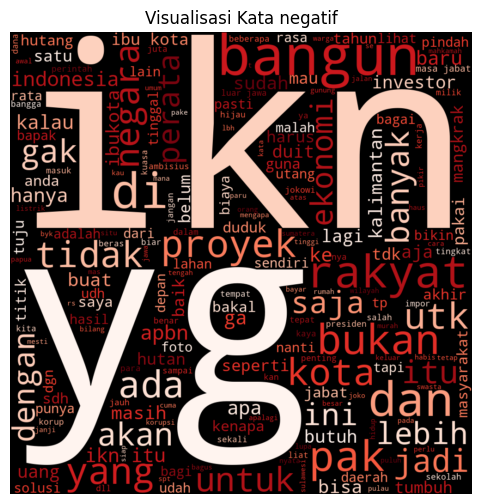

In [26]:
all_text_s0 = ' '.join(word for word in data_negative["tokenized"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='black').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata negatif")
plt.margins(x=0, y=0)
plt.show()

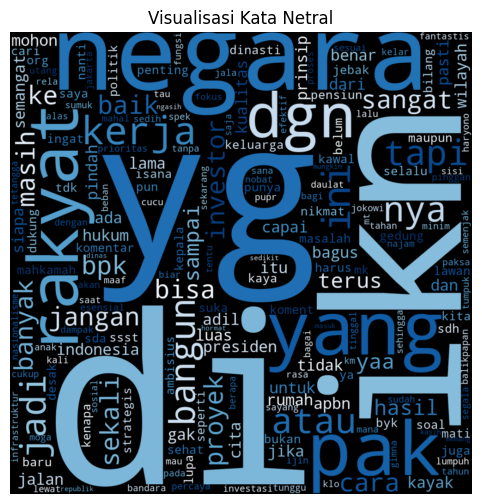

In [27]:
all_text_s1 = ' '.join(word for word in data_netral["tokenized"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='black').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

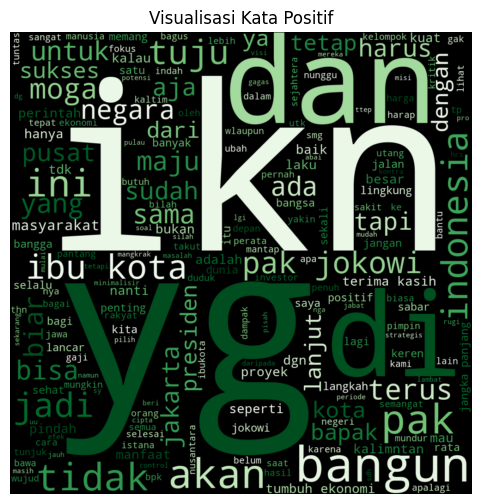

In [28]:
all_text_s2 = ' '.join(word for word in data_positif["tokenized"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='black').generate(all_text_s2)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [29]:
data_clean ['Sentiment'].value_counts()

Sentiment
0    91
2    44
1    17
Name: count, dtype: int64

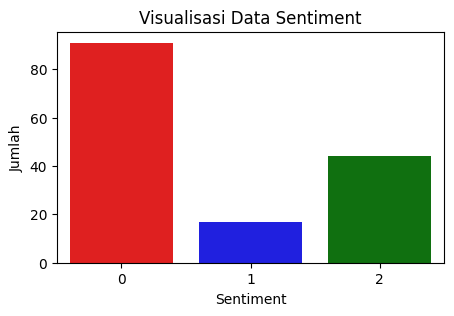

In [30]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data_clean, x='Sentiment', palette={0:"red", 1:"blue", 2:"green"})
plt.title('Visualisasi Data Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
x = data_clean['tokenized']
y = data_clean['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=42)

In [32]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [33]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_vec, y_train)

In [34]:
naive_bayes= MultinomialNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

MultinomialNB()

In [35]:
y_pred = naive_bayes.predict(x_test_vec)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])

print("Akurasi Model :",accuracy)
print("\nLaporan Klasifikasi :\n",classification_rep)

Akurasi Model : 0.6521739130434783

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.75      0.69      0.72        13
      Netral       0.00      0.00      0.00         1
     Positif       0.75      0.67      0.71         9

    accuracy                           0.65        23
   macro avg       0.50      0.45      0.48        23
weighted avg       0.72      0.65      0.68        23



In [40]:
new_text = input("\nMasukan teks baru: ")
new_text_vec = vectorizer.transform([new_text])
predict_sentimen = naive_bayes.predict(new_text_vec)

if predict_sentimen[0]==2:
    sentimen_label = "Positif"
elif predict_sentimen[0]==1:
    sentimen_label = "Netral"
elif predict_sentimen[0]==0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentiment teks baru",sentimen_label)


Masukan teks baru:  saya setuju dengan ide pemngabunan IKN, namun tidak setuju dengan pengambilan dana dari APBN yang memberatkan rakyat luas


Hasil Analisis Sentiment teks baru Negatif
